# 1.预处理

In [317]:
#导入
import pandas as pd
import numpy as np
import plotly as py
ted = pd.read_csv("ted_main.csv",encoding='gbk')
ted.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292


In [318]:
#查看数据集的列
ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [319]:
#重命名列名方便理解
''''''
ted.rename(columns = {'comments':'评论数', 'description':'描述', 'duration':'时长', 'event':'活动名', 'film_date':'拍摄日期',
                         'languages':'语言数', 'main_speaker':'主讲人', 'name':'演讲名', 'num_speaker':'主讲人数', 'published_date':'发行日期',
                         'ratings':'评级', 'related_talks':'相关演讲', 'speaker_occupation':'主讲人职业', 'tags':'标签', 'title':'主题',
                         'url':'链接', 'views':'浏览量'}, inplace = True)

In [320]:
#把要处理的数据列调到前面方便看
ted = ted[['演讲名', '主题','浏览量' , '评论数', '拍摄日期', '发行日期',  '主讲人', '主讲人职业', '时长', '语言数', '主讲人数','活动名','描述', '标签', '评级', '相关演讲', '链接']]
ted.head(3)

,演讲名,主题,浏览量,评论数,拍摄日期,发行日期,主讲人,主讲人职业,时长,语言数,主讲人数,活动名,描述,标签,评级,相关演讲,链接
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,47227110,4553,1140825600,1151367060,Ken Robinson,Author/educator,1164,60,1,TED2006,Sir Ken Robinson makes an entertaining and pro...,"['children', 'creativity', 'culture', 'dance',...","[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...
1,Al Gore: Averting the climate crisis,Averting the climate crisis,3200520,265,1140825600,1151367060,Al Gore,Climate advocate,977,43,1,TED2006,With the same humor and humanity he exuded in ...,"['alternative energy', 'cars', 'climate change...","[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...
2,David Pogue: Simplicity sells,Simplicity sells,1636292,124,1140739200,1151367060,David Pogue,Technology columnist,1286,26,1,TED2006,New York Times columnist David Pogue takes aim...,"['computers', 'entertainment', 'interface desi...","[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...


In [321]:
#这是日期？什么鬼
a=ted['拍摄日期'].unique()
a

array([1140825600, 1140739200, 1140912000, 1140566400, 1138838400,
       1140652800, 1139184000, 1077753600, 1109289600, 1121299200,
       1077580800, 1075852800, 1120694400, 1077840000, 1075680000,
       1121385600, 1109376000, 1121212800, 1120176000, 1121126400,
       1109203200, 1108598400, 1109116800, 1164844800, 1107302400,
       1044230400, 1173312000, 1014940800, 1046304000, 1012608000,
       1044144000, 1166054400, 1077667200, 1141344000, 1172880000,
       1164931200, 1181001600, 1181174400, 1180915200, 1181088000,
       1181260800, 1173398400, 1173139200,  981072000, 1189296000,
       1167609600, 1173225600, 1014854400, 1015113600, 1204070400,
       1204156800,  444528000,  636422400, 1204243200, 1141084800,
       1204502400, 1201910400, 1197417600, 1078272000, 1046649600,
       1170374400, 1202774400,  886377600, 1196553600, 1196640000,
        888624000, 1204329600, 1172707200, 1046390400, 1222992000,
       1078012800, 1254355200, 1255478400, 1109548800, 1210118

In [322]:
#时间处理（参考https://blog.csdn.net/qq_36330643/article/details/78473140）
#还有一种办法就是用excel打开日期栏格式改一下，这里还是用科学的方法~

import datetime

ted['拍摄日期'] = ted['拍摄日期'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
ted['发行日期'] = ted['发行日期'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))

In [323]:
ted.head(2)

,演讲名,主题,浏览量,评论数,拍摄日期,发行日期,主讲人,主讲人职业,时长,语言数,主讲人数,活动名,描述,标签,评级,相关演讲,链接
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,47227110,4553,25-02-2006,27-06-2006,Ken Robinson,Author/educator,1164,60,1,TED2006,Sir Ken Robinson makes an entertaining and pro...,"['children', 'creativity', 'culture', 'dance',...","[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...
1,Al Gore: Averting the climate crisis,Averting the climate crisis,3200520,265,25-02-2006,27-06-2006,Al Gore,Climate advocate,977,43,1,TED2006,With the same humor and humanity he exuded in ...,"['alternative energy', 'cars', 'climate change...","[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...


In [324]:
# 检查空值
ted.isnull().any()

演讲名      False
主题       False
浏览量      False
评论数      False
拍摄日期     False
发行日期     False
主讲人      False
主讲人职业     True
时长       False
语言数      False
主讲人数     False
活动名      False
描述       False
标签       False
评级       False
相关演讲     False
链接       False
dtype: bool

In [325]:
# 查看一下speaker_occupation缺失值的具体情况
ted[ted['主讲人职业'].isnull()]

,演讲名,主题,浏览量,评论数,拍摄日期,发行日期,主讲人,主讲人职业,时长,语言数,主讲人数,活动名,描述,标签,评级,相关演讲,链接
1113,Sonaar Luthra: Meet the Water Canary,Meet the Water Canary,353749,145,14-07-2011,17-01-2012,Sonaar Luthra,NaN,217,38,1,TEDGlobal 2011,"After a crisis, how can we tell if water is sa...","['TED Fellows', 'design', 'global development'...","[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 523, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/sonaar_luthra_meet_t...
1192,Rick Falkvinge: I am a pirate,I am a pirate,181010,122,11-03-2012,01-04-2012,Rick Falkvinge,NaN,1097,10,1,TEDxObserver,"The Pirate Party fights for transparency, anon...","['Internet', 'TEDx', 'global issues', 'politic...","[{'id': 8, 'name': 'Informative', 'count': 156...","[{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/rick_falkvinge_i_am_...
1220,Gary Kovacs: Tracking our online trackers,Tracking our online trackers,2098639,257,29-02-2012,03-05-2012,Gary Kovacs,NaN,399,32,1,TED2012,"As you surf the Web, information is being coll...","['Internet', 'advertising', 'business', 'priva...","[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/gary_kovacs_tracking...
1656,Ryan Holladay: To hear this music you have to ...,To hear this music you have to be there. Liter...,1284510,140,30-10-2013,11-01-2014,Ryan Holladay,NaN,389,33,1,TED@BCG San Francisco,"In this lovely talk, TED Fellow Ryan Holladay ...","['TED Fellows', 'entertainment', 'music', 'tec...","[{'id': 1, 'name': 'Beautiful', 'count': 211},...","[{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/ryan_holladay_to_hea...
1911,Brian Dettmer: Old books reborn as art,Old books reborn as art,1159937,48,04-11-2014,07-02-2015,Brian Dettmer,NaN,366,34,1,TEDYouth 2014,What do you do with an outdated encyclopedia i...,"['TEDYouth', 'art', 'books', 'creativity']","[{'id': 1, 'name': 'Beautiful', 'count': 361},...","[{'id': 610, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/brian_dettmer_old_bo...
1949,Boniface Mwangi: The day I stood up alone,The day I stood up alone,1342431,70,20-10-2014,02-04-2015,Boniface Mwangi,NaN,440,33,1,TEDGlobal 2014,Photographer Boniface Mwangi wanted to protest...,"['TED Fellows', 'activism', 'art', 'corruption...","[{'id': 3, 'name': 'Courageous', 'count': 614}...","[{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/boniface_mwangi_boni...


主讲人职业中有6行存在空值，其他栏不存在空值。目测对之后分析的影响不大。

In [326]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
演讲名      2550 non-null object
主题       2550 non-null object
浏览量      2550 non-null int64
评论数      2550 non-null int64
拍摄日期     2550 non-null object
发行日期     2550 non-null object
主讲人      2550 non-null object
主讲人职业    2544 non-null object
时长       2550 non-null int64
语言数      2550 non-null int64
主讲人数     2550 non-null int64
活动名      2550 non-null object
描述       2550 non-null object
标签       2550 non-null object
评级       2550 non-null object
相关演讲     2550 non-null object
链接       2550 non-null object
dtypes: int64(5), object(12)
memory usage: 338.8+ KB


# 2.数据分析

In [327]:
# 各个column内容的描述性统计
ted.describe()

,浏览量,评论数,时长,语言数,主讲人数
count,2.550000e+03,2550.000000,2550.000000,2550.000000,2550.000000
mean,1.698297e+06,191.562353,826.510196,27.326275,1.028235
std,2.498479e+06,282.315223,374.009138,9.563452,0.207705
min,5.044300e+04,2.000000,135.000000,0.000000,1.000000
25%,7.557928e+05,63.000000,577.000000,23.000000,1.000000
50%,1.124524e+06,118.000000,848.000000,28.000000,1.000000
75%,1.700760e+06,221.750000,1046.750000,33.000000,1.000000
max,4.722711e+07,6404.000000,5256.000000,72.000000,5.000000


特地百度了下，观看数平均数：1.698297e+06=1698297，约170w，中位数112w；

评论均值有191w，，中位数有118w。

由此可以看出，数据量还是比较大的有一定可信度，但是观看数和评论数存在一定的差异，我们来探索一下他们的相关关系~

## 1：浏览量和评论数的关系？

In [328]:
ted[['浏览量', '评论数']].corr()

,浏览量,评论数
浏览量,1.000000,0.530939
评论数,0.530939,1.000000


根据相关系数矩阵我们可以看出二者的皮尔逊相关系数为0.53，具有显著相关性。

In [329]:
#试试画个相关关系图，参考：https://plot.ly/python/line-and-scatter/
a =ted['浏览量']
a.head(3)

0    47227110
1     3200520
2     1636292
Name: 浏览量, dtype: int64

In [330]:
import plotly.express as px
fig = px.scatter(x=ted['浏览量'], y=ted['评论数'])
fig.show()

从图中可以看出，除了个别样本点外，二者大概是存在正相关性的

那么看看和时长有没有关系？在短视频爆发的时代，人们会不会因为没耐心不看视频呢？

In [331]:
ted['时长'] = ted['时长']/60
ted['时长'].describe()

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: 时长, dtype: float64

In [332]:
ted[['浏览量', '时长']].corr()

,浏览量,时长
浏览量,1.00000,0.04874
时长,0.04874,1.00000


根据相关系数矩阵我们可以看出二者的皮尔逊相关系数为0.04，基本无关。

# 2.浏览量和评论数TOP10视频是什么？

In [333]:
#浏览量top10
views_ted = ted[['主讲人', '主题','发行日期', '浏览量','评论数','标签','主讲人职业','主讲人数']].sort_values(by = '浏览量', ascending = False)
views_ted.head(10)

,主讲人,主题,发行日期,浏览量,评论数,标签,主讲人职业,主讲人数
0,Ken Robinson,Do schools kill creativity?,27-06-2006,47227110,4553,"['children', 'creativity', 'culture', 'dance',...",Author/educator,1
1346,Amy Cuddy,Your body language may shape who you are,01-10-2012,43155405,2290,"['body language', 'brain', 'business', 'psycho...",Social psychologist,1
677,Simon Sinek,How great leaders inspire action,04-05-2010,34309432,1930,"['TEDx', 'business', 'entrepreneur', 'leadersh...",Leadership expert,1
837,Brené Brown,The power of vulnerability,23-12-2010,31168150,1927,"['TEDx', 'communication', 'culture', 'depressi...",Vulnerability researcher,1
452,Mary Roach,10 things you didn't know about orgasm,20-05-2009,22270883,354,"['books', 'culture', 'history', 'humor', 'scie...",Writer,1
1776,Julian Treasure,How to speak so that people want to listen,27-06-2014,21594632,297,"['culture', 'sound', 'speech']",Sound consultant,1
201,Jill Bolte Taylor,My stroke of insight,12-03-2008,21190883,2877,"['biology', 'brain', 'consciousness', 'global ...",Neuroanatomist,1
5,Tony Robbins,Why we do what we do,28-06-2006,20685401,672,"['business', 'culture', 'entertainment', 'goal...",Life coach; expert in leadership psychology,1
2114,James Veitch,This is what happens when you reply to spam email,09-01-2016,20475972,150,"['comedy', 'communication', 'curiosity', 'humo...",Comedian and writer,1
1416,Cameron Russell,"Looks aren't everything. Believe me, I'm a model.",17-01-2013,19787465,846,"['TEDx', 'beauty', 'culture', 'fashion', 'phot...",Model,1


由上表标签粗略可以看出，浏览量最多的是2006-6-27，由Ken Robinson演讲的“Do schools kill creativity?”关于教育和孩子的主题，有4700w浏览量，有4553评论。

人们比较感兴趣的主题是教育、人文、职场、自我提升等几个领域的，接下来我们来验证一下

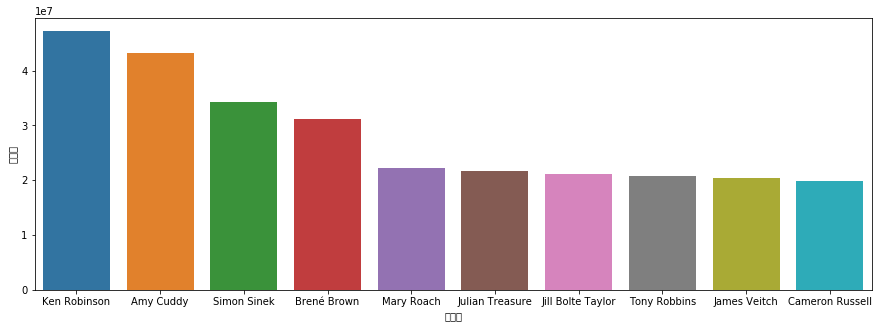

In [334]:
plt.figure(figsize=(15,5))
sns.barplot(x='主讲人', y='浏览量', data=views_ted.head(10))
plt.show()

In [335]:
import ast
ted['标签'] = ted['标签'].apply(lambda x: ast.literal_eval(x))
ted['标签'].head()

0    [children, creativity, culture, dance, educati...
1    [alternative energy, cars, climate change, cul...
2    [computers, entertainment, interface design, m...
3    [MacArthur grant, activism, business, cities, ...
4    [Africa, Asia, Google, demo, economics, global...
Name: 标签, dtype: object

In [336]:
# 将每个视频的标签拆开
s = ted.apply(lambda x: pd.Series(x['标签']),axis=1).stack().reset_index(level=1, drop=True)
s.name = '主题'
s.head()

0      children
0    creativity
0       culture
0         dance
0     education
Name: 主题, dtype: object

In [337]:
# 将拆分好的标签加回原数据集
theme_df = ted.drop('主题', axis = 1).join(s)
theme_df.head(2)

,演讲名,浏览量,评论数,拍摄日期,发行日期,主讲人,主讲人职业,时长,语言数,主讲人数,活动名,描述,标签,评级,相关演讲,链接,主题
0,Ken Robinson: Do schools kill creativity?,47227110,4553,25-02-2006,27-06-2006,Ken Robinson,Author/educator,19.4,60,1,TED2006,Sir Ken Robinson makes an entertaining and pro...,"[children, creativity, culture, dance, educati...","[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,children
0,Ken Robinson: Do schools kill creativity?,47227110,4553,25-02-2006,27-06-2006,Ken Robinson,Author/educator,19.4,60,1,TED2006,Sir Ken Robinson makes an entertaining and pro...,"[children, creativity, culture, dance, educati...","[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,creativity


In [338]:
# 评论top10的视频
views_ted = ted[['主讲人', '主题','发行日期', '浏览量','评论数','标签','主讲人职业','主讲人数']].sort_values(by = '评论数', ascending = False)
views_ted.head(10)

,主讲人,主题,发行日期,浏览量,评论数,标签,主讲人职业,主讲人数
96,Richard Dawkins,Militant atheism,16-04-2007,4374792,6404,"[God, atheism, culture, religion, science]",Evolutionary biologist,1
0,Ken Robinson,Do schools kill creativity?,27-06-2006,47227110,4553,"[children, creativity, culture, dance, educati...",Author/educator,1
644,Sam Harris,Science can answer moral questions,22-03-2010,3433437,3356,"[culture, evolutionary psychology, global issu...","Neuroscientist, philosopher",1
201,Jill Bolte Taylor,My stroke of insight,12-03-2008,21190883,2877,"[biology, brain, consciousness, global issues,...",Neuroanatomist,1
1787,David Chalmers,How do you explain consciousness?,14-07-2014,2162764,2673,"[brain, consciousness, neuroscience, philosophy]",Philosopher,1
954,Janet Echelman,Taking imagination seriously,08-06-2011,1832930,2492,"[art, cities, culture, data, design, technolog...",Artist,1
840,Lesley Hazleton,On reading the Koran,04-01-2011,1847256,2374,"[TEDx, culture, global issues, journalism, rel...","Writer, psychologist",1
1346,Amy Cuddy,Your body language may shape who you are,01-10-2012,43155405,2290,"[body language, brain, business, psychology, s...",Social psychologist,1
661,Michael Specter,The danger of science denial,12-04-2010,1838628,2272,"[global issues, medicine, religion, science, w...",Writer,1
677,Simon Sinek,How great leaders inspire action,04-05-2010,34309432,1930,"[TEDx, business, entrepreneur, leadership, suc...",Leadership expert,1


# 3：看看哪些主题演讲比较多？

In [364]:
pop_themes=theme_df['主题'].value_counts()
pop_themes.head(10)

technology       727
science          567
global issues    501
culture          486
TEDx             450
design           418
business         348
entertainment    299
health           236
innovation       229
Name: 主题, dtype: int64

In [365]:
# 看看那些主题比较受关注（评论比较多）
import plotly.graph_objects as go

import numpy as np
x=theme_df['评论数']
y = theme_df['主题']
# Use `y` argument instead of `x` for horizontal histogram

fig = go.Figure(data=[go.Histogram(y=y)])
fig.show()

可以看出，TED演讲谈论最多的领域是科技、科学、全球问题、文化、TEDx活动经验等问题。跟我刚刚凭直观看表的猜测有一定的误差，因此我们还是以数据来说话。

# 4：主讲人都来自什么职业？

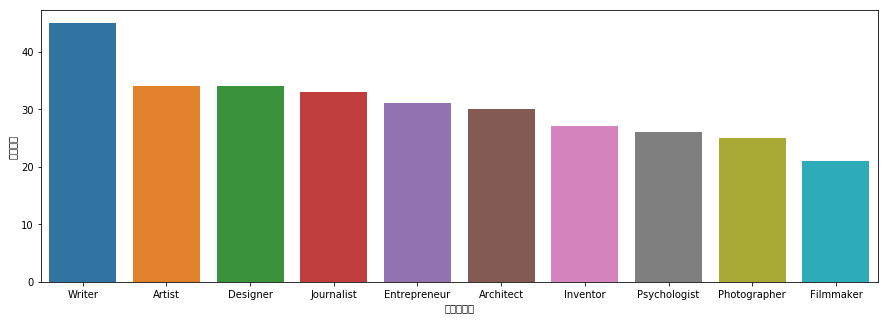

In [375]:
occupation_df = ted.groupby('主讲人职业').count().reset_index()[['主讲人职业', '评论数']]
occupation_df.columns = ['主讲人职业', '演讲次数']
occupation_df = occupation_df.sort_values('演讲次数', ascending = False)

plt.figure(figsize=(15,5))
sns.barplot(x='主讲人职业', y='演讲次数', data=occupation_df.head(10))
plt.show()

# 5.每个时间段的评论和浏览量？

In [391]:
# 月份和星期的顺序
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

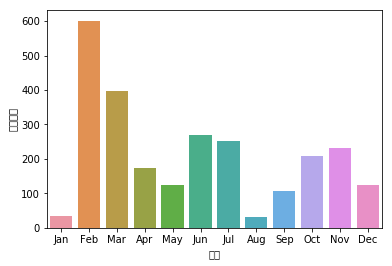

In [399]:
# 加一列月份
ted['月份'] = ted['拍摄日期'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])
month_df = pd.DataFrame(ted['月份'].value_counts()).reset_index()
month_df.columns = ['月份', '演讲次数']

sns.barplot(x = '月份', y = '演讲次数', data = month_df, order = month_order)


有上图可以看出TED演讲的产出最多是二三月分，此前是六七月份，再而是十十一月份，有季节特点，春季产出最多，其次是暑寒假，符合人们的观看习惯。

In [454]:
# 添加年份列
ted['年'] = ted['拍摄日期'].apply(lambda x: x.split('-')[2])
year_df = pd.DataFrame(ted['年'].value_counts().reset_index())
year_df.columns = ['years', 'times']


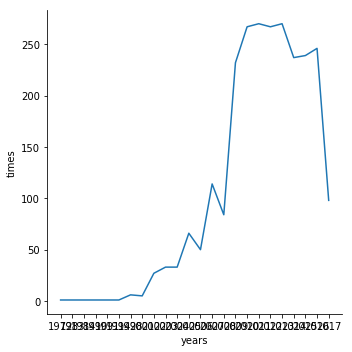

In [460]:
sns.relplot(x="years", y="times", kind="line", data=year_df)
# 显示
plt.show()

可以看出：

TED演讲的视频数量逐年上升；

2008到2019年，视频数量急剧上升

2009年后稳定在250个左右

后来又呈现下降趋势



# 5.研究中：https://plot.ly/python/line-and-scatter/

In [412]:
from IPython.display import IFrame
IFrame(src= "https://dash-simple-apps.plotly.host/dash-linescatterplot/", width="100%",height="750px", frameBorder="0")

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
import os
from app import app

if 'DYNO' in os.environ:
    app_name = os.environ['DASH_APP_NAME']
else:
    app_name = 'dash-linescatterplot'

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/Wage%20Rigidity%20Dataset.csv')
df.dropna(inplace=True)
df['year'] = pd.DatetimeIndex(df['Date']).year

layout = html.Div([
    html.Div([html.H1("Employment Wage Rigidity")], style={"text-align": "center"}),
    html.Div(dcc.Graph(id="my-graph")),
    html.Div([dcc.RangeSlider(id='year-slider', min=1983, max=df['year'].max(),
                              marks={1983: '1983', 1990: '1990', 2000: '2000', 2003: '2003', 2005: '2005', 2008: '2008',
                                     2010: '2010', 2013: '2013', 2016: '2016'}, value=[2000, 2005])
              ], style={"margin": 20, "padding": 30})
], className="container")


@app.callback(
    dash.dependencies.Output('my-graph', 'figure'),
    [dash.dependencies.Input('year-slider', 'value')])
def update_figure(selected_year):
    pd.options.mode.chained_assignment = None  # default='SettingWithCopyWarning'
    dff = df[(df.year >= selected_year[0]) & (df.year <= selected_year[1])]
    dff['Date'] = pd.to_datetime(dff['Date']).dt.strftime('%y/%d')
    trace1 = go.Scatter(y=dff["Hourly workers"], x=dff["Date"], mode='lines+markers', marker={"size": 3.5},
                        name="Hourly")
    trace2 = go.Scatter(y=dff['Non-hourly workers'], x=dff["Date"], mode='markers', marker={"size": 3},
                        name="Non-Hourly")
    trace3 = go.Scatter(y=dff["High school"], x=dff["Date"], mode='lines', marker={"size": 2}, name="High school")
    trace4 = go.Scatter(y=dff["Construction"], x=dff["Date"], mode='lines+markers', marker={"size": 3.5},
                        name="Construction")
    trace5 = go.Scatter(y=dff["Finance"], x=dff["Date"], mode='lines', marker={"size": 2}, name="Finance")
    trace6 = go.Scatter(y=dff["Manufacturing"], x=dff["Date"], mode='markers', marker={"size": 3}, name="Manufacturing")
    data = [trace1, trace2, trace3, trace4, trace5, trace6]
    return {"data": data,
            "layout": go.Layout(title=f"Wage Rigidity for {'-'.join(str(i) for i in selected_year)}",
                                yaxis={"title": "% of Jobstayers With a Wage Change of Zero", "range": [0, 25],
                                       "tick0": 0, "dtick": 5}, xaxis={"title": "Year", "tickangle": 45}, )}
